In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Predicting Car prices

- Our goal is to create a model that can predict the price of cars
- Method: we'll be using a K-nearest Neighbour Technique
- DataSet: From 1985 Ward's Automotive Yearbook https://archive.ics.uci.edu/ml/datasets/automobile

# Getting to know the data

In [3]:
car_data = pd.read_csv('imports-85.data', header=None, names =['Attribute Range','normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'])

In [4]:
car_data.head()

,Attribute Range,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
car_data.columns

Index(['Attribute Range', 'normalized-losses', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
Attribute Range      205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [7]:
car_data.describe()

,Attribute Range,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [8]:
car_data.shape

(205, 26)

In [9]:
car_data.tail()

,Attribute Range,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [10]:
car_data.isnull().sum()

Attribute Range      0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

# Column Description

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

# Checking Columns that can be used as attributes

Numerical columns that could be used as feature;

- wheel-base           205 non-null float64
- length               205 non-null float64
- width                205 non-null float64
- height               205 non-null float64
- engine-size          205 non-null int64
- compression-ratio    205 non-null float64
- city-mpg (miles per gallon)            205 non-null int64
- highway-mpg   (miles per gallon)       205 non-null int64
- horsepower           205 non-null object
- peak-rpm (Search Results Revolutions per minute)  205 non-null object
- price                205 non-null object

<br>

Interesting candidates;

- engine-size
- horsepower
- price
- num-of-cylinders (object but could be transformed into int)

# Step_1: Preparing the data

In [11]:
# inspecting the columns
car_data['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
95      5
94      5
65      5
74      5
85      5
168     5
103     5
102     5
118     4
148     4
122     4
106     4
93      4
125     3
154     3
83      3
101     3
115     3
137     3
192     2
87      2
110     2
197     2
158     2
188     2
164     2
129     2
89      2
113     2
119     2
108     2
194     2
81      2
145     2
153     2
231     1
142     1
121     1
78      1
256     1
77      1
98      1
186     1
90      1
107     1
Name: normalized-losses, dtype: int64

In [12]:
# we have to replace the '?' by NaN

car_data = car_data.replace('?', np.nan)

In [13]:
car_data.isnull().sum()

Attribute Range       0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [14]:
# selecting only continuous values for our Machine Learning Model

continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = car_data[continuous_values_cols]

In [15]:
# changing column types from object to float
numeric_cars = numeric_cars.astype('float')

In [16]:
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [17]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null float64
highway-mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(14)
memory usage: 22.5 KB


In [18]:
numeric_cars.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


We estimate that the missing values can be replaced by using the mean
Considering the impact of removing data from a 200+ rows df, we want to keep as many values as possible

In [19]:
numeric_cars['normalized-losses'] = numeric_cars['normalized-losses'].fillna(numeric_cars['normalized-losses'].mean())

In [20]:
numeric_cars['bore']= numeric_cars['bore'].fillna(numeric_cars['bore'].mean())

In [21]:
numeric_cars['stroke']= numeric_cars['stroke'].fillna(numeric_cars['stroke'].mean())

In [22]:
numeric_cars['horsepower'] = numeric_cars['horsepower'].fillna(numeric_cars['horsepower'].mean())

In [23]:
numeric_cars['peak-rpm'] = numeric_cars['peak-rpm'].fillna(numeric_cars['peak-rpm'].mean())

In [24]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                4
dtype: int64

Since we are going to predict the price, we will remove the rows with missing price values

In [25]:
numeric_cars = numeric_cars.dropna()

In [26]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

# 1st Machine Learning Model: Univariate

We will start with a 1 variable model (univariate) i.e. predicting the price of the car based on 1 variable (here 1 column)

<br>

Let's recall the steps needed to create the ML model:

- Import functions: KNN & MSE
- Normalise data

<br>

- Shuffle Index
- Split dataset intro train & test
- Select features and target
- Fit
- Predict
- RMSE = compare on a scale real vs predicted number, the closer to 0, the better the prediction

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
knn = KNeighborsRegressor()

In [28]:
# Normalise data

target_col = numeric_cars['price']
normalised_data = (numeric_cars - numeric_cars.min()) / (numeric_cars.max() - numeric_cars.min())
normalised_data['price'] = target_col

In [29]:
normalised_data.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.298429,0.355598,0.494045,0.477697,0.497222,0.414145,0.564780,0.565178,0.197767,0.258904,0.394965,0.338308,0.386489,13207.129353
std,0.167520,0.176862,0.183913,0.179613,0.203985,0.200658,0.191480,0.150499,0.250310,0.174606,0.195148,0.178423,0.179346,7947.066342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5118.000000
25%,0.188482,0.230321,0.383582,0.324786,0.350000,0.264158,0.435714,0.495238,0.100000,0.102804,0.265306,0.166667,0.236842,7775.000000
50%,0.298429,0.303207,0.479104,0.444444,0.525000,0.359193,0.550000,0.580952,0.125000,0.219626,0.398110,0.305556,0.368421,10295.000000
75%,0.376963,0.460641,0.632836,0.538462,0.641667,0.557797,0.742857,0.638095,0.150000,0.317757,0.551020,0.472222,0.473684,16500.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45400.000000


In [30]:
# creating one simple function to go through ML process

def knn_train_test(selected_columns, target_column, dataframe):
    
    # shuffle index
    np.random.seed(1)
    shuffled_index = np.random.permutation(dataframe.index)
    randomised_dataframe = dataframe.reindex(shuffled_index)
    
    # split the data
    halved_df = int(len(randomised_dataframe) / 2)
    train_df = randomised_dataframe.iloc[0:halved_df]
    test_df = randomised_dataframe.iloc[halved_df:]
    
    # fitting the model
    staying_fit = knn.fit(train_df[[selected_columns]], train_df[target_column])
    
    #predict
    predictions = knn.predict(test_df[[selected_columns]])
    
    #RMSE
    y_true = test_df[target_column]
    y_pred = predictions
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)
    
    return RMSE

Let's use this function on several columns and keep the price as a target

In [31]:
all_rmses = {}

columns = numeric_cars.columns

for data in columns:
    RMSE_Columns = knn_train_test(data, 'price', normalised_data)
    all_rmses[data] = RMSE_Columns

In [32]:
all_rmses

{'normalized-losses': 7330.197653434445,
 'wheel-base': 5461.553997873057,
 'length': 5427.2009608367125,
 'width': 4704.482589704386,
 'height': 8144.441042663747,
 'curb-weight': 4401.118254793124,
 'bore': 6768.306012643937,
 'stroke': 8006.529544647101,
 'compression-ratio': 6610.812153159129,
 'horsepower': 4053.1096389007903,
 'peak-rpm': 7697.4596964334805,
 'city-mpg': 4766.422505090134,
 'highway-mpg': 4630.026798588056,
 'price': 1427.0212970303621}

# Conclusion

The horsepower gets the closest to 0, it makes sense that the higher the horsepower, the higher the price should be. 
Interestingly, the city-mpg column (city - miles per gallon), highway-mpg and width of the car are good features to estimate the price of a car.
Let's not forget that these variables are taken independently.

# 2nd Machine Learning Model: Univariate with K-values change

Testing unique variables with different K values

- We'll use the same function but add a loop to check different K values

In [33]:
# creating a simple function to go through the ML process including K values

def knn_train_test_k_values(selected_column, target_column, dataframe):
    
    # shuffle index
    np.random.seed(2)
    shuffled_index = np.random.permutation(dataframe.index)
    randomised_dataframe = dataframe.reindex(shuffled_index)
    
    # split the data
    halved_dataframe = int(len(dataframe) / 2)
    train_df = randomised_dataframe.iloc[0:halved_dataframe]
    test_df = randomised_dataframe.iloc[halved_dataframe:]
    
    # Initialise K values
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[[selected_column]], train_df[target_column])
        
        # Make predictions
        
        predictions = knn.predict(test_df[[selected_column]])
        
        # RMSES
        
        y_true =  test_df[target_column]
        x_pred =  predictions
        MSE = mean_squared_error(y_true, x_pred)
        RMSE = np.sqrt(MSE)
    
        k_rmses[k] = RMSE
    
    return k_rmses

In [34]:
all_rmses = {}

columns = numeric_cars.columns.drop('price')

for col in columns:
    rmse = knn_train_test_k_values(col, 'price', numeric_cars)
    all_rmses[col] = rmse

In [35]:
all_rmses

{'normalized-losses': {1: 9962.792797043994,
  3: 9017.414829108175,
  5: 8111.268795452361,
  7: 8537.843218542313,
  9: 8520.654293360916},
 'wheel-base': {1: 7190.166713389658,
  3: 7275.724958302566,
  5: 7365.198822909678,
  7: 7391.6830470559935,
  9: 7418.516692786961},
 'length': {1: 5451.514139745175,
  3: 5605.774171281424,
  5: 5853.581265556603,
  7: 6151.58338804217,
  9: 6257.8335675905155},
 'width': {1: 5707.359901005364,
  3: 5067.598634540041,
  5: 5227.640674925794,
  7: 5407.511513818086,
  9: 5445.146208954389},
 'height': {1: 8779.288411927357,
  3: 8988.781748937561,
  5: 8619.321976504503,
  7: 8527.554839821962,
  9: 8593.556043828748},
 'curb-weight': {1: 5271.012124049914,
  3: 4456.515695609578,
  5: 4424.975933748954,
  7: 4569.000254665872,
  9: 4913.234299086159},
 'bore': {1: 7702.0597823627095,
  3: 6737.166230254484,
  5: 7179.2148832171015,
  7: 7204.548751579213,
  9: 6972.637886434578},
 'stroke': {1: 9917.48127008941,
  3: 7745.165982024459,
  5: 8

# Conclusion

The K values were mostly providing best results when at 3

# 3rd Machine Learning Model: Multivariate with K-values change

- This time we'll modify the function so that it accepts a list of columns (multiple variables)
- The whole function will thus have to adapt to this new parameter

<br>

We'll be using the avg RMSE values across different K for each feature we already calculated previously (all_rmses)


In [36]:
# Getting the avg of RMSE values from the previous step

feature_avg_rmse = {}

for k, v in all_rmses.items():
    average_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = average_rmse
    

# turn the dictionary into a series

series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()

In [37]:
sorted_series_avg_rmse

curb-weight          4726.947661
highway-mpg          4830.990822
horsepower           5003.915645
width                5371.051387
city-mpg             5639.780473
length               5864.057306
bore                 7159.125507
wheel-base           7328.258047
compression-ratio    7369.391377
peak-rpm             8528.407160
stroke               8613.117848
height               8701.700604
normalized-losses    8829.994787
dtype: float64

In [38]:
sorted_features = sorted_series_avg_rmse.index

Now that we have the avg RMSE for each feature we will use them for our final model

In [39]:
def knn_train_test_columns(selected_columns, target_column, dataframe):
    # shuffling
    np.random.seed(3)
    shuffled_index = np.random.permutation(dataframe.index)
    randomised_dataframe = dataframe.reindex(shuffled_index)
    
    #splitting
    halved_dataframe = int(len(dataframe) / 2 )
    
    train_df = randomised_dataframe.iloc[0:halved_dataframe]
    test_df = randomised_dataframe.iloc[halved_dataframe:]
    
    #setting-up the k-values & dictionary where k_rmses will be stored
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[selected_columns], train_df[target_column])
        
        # predicting
        predicted_labels = knn.predict(test_df[selected_columns])
        
        # RMESing
        
        y_true = test_df[target_column]
        x_predict = predicted_labels
        mse = mean_squared_error(y_true, x_predict)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    
    return k_rmses
    


In [40]:
k_rmse_results = {}

for nr_best_feats in range(2,7):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test_columns(
        sorted_features[:nr_best_feats],
        'price',
        numeric_cars
    )

k_rmse_results

{'2 best features': {5: 4076.079919007798},
 '3 best features': {5: 3858.1898092188767},
 '4 best features': {5: 3858.214839857294},
 '5 best features': {5: 3858.214839857294},
 '6 best features': {5: 3853.002508781076}}

# Conclusion


6 best features with k_5 yields the best result so far

# 4th Machine Learning Model: Multivariate with K-values change, hyperparameter Tuning

- Let's take the 3 best past models
- We will vary the hyperparameters from 1 to 25

<br>

Finally, let's create a final plot to see the most optimal k value for each model

In [41]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for nr_best_feats in range(2,6):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        numeric_cars
    )

k_rmse_results

{'2 best features': {1: 5286.848063406453,
  2: 5546.588555272975,
  3: 5036.534207565993,
  4: 4743.081327596863,
  5: 4390.171284148081,
  6: 4280.984033984468,
  7: 4330.136316853062,
  8: 4491.34632584575,
  9: 4631.707237456234,
  10: 4613.877931430199,
  11: 4730.468688591737,
  12: 4759.4385559485145,
  13: 4889.2503157206465,
  14: 4937.891260766295,
  15: 5031.861271731743,
  16: 5044.483032257325,
  17: 5045.324972450435,
  18: 5091.953722991636,
  19: 5143.984105609009,
  20: 5212.530015299292,
  21: 5214.871221663564,
  22: 5167.1714520151245,
  23: 5223.8420505483045,
  24: 5219.126694664947},
 '3 best features': {1: 4509.369164021254,
  2: 4320.111400459048,
  3: 3980.7586614051393,
  4: 4071.9374277145726,
  5: 4009.7027410623805,
  6: 3987.8602144425763,
  7: 4093.0095425958834,
  8: 4238.534846513756,
  9: 4484.739771981575,
  10: 4487.983496433273,
  11: 4658.262105422102,
  12: 4712.928993467835,
  13: 4846.28781744001,
  14: 4929.191594537765,
  15: 4961.84631884071

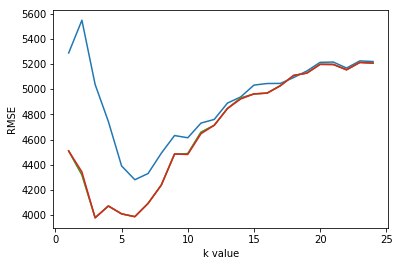

In [43]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x, y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

# Conclusion

The model reaches best results when having multivariables and a k-value of 6